In [2]:
import fastai.tabular.all as ft
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [3]:
pd.read_csv('diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df = pd.read_csv('diabetes.csv', low_memory = False)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df[df['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().values.any()

False

## Visualizar los datos

In [45]:
import seaborn as sns

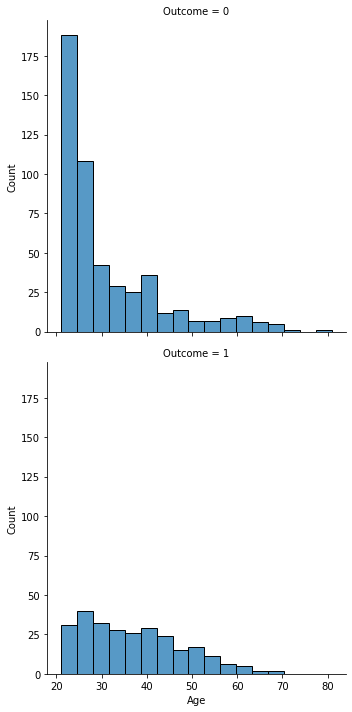

In [48]:
sns.displot(df, x = 'Age', row = 'Outcome')

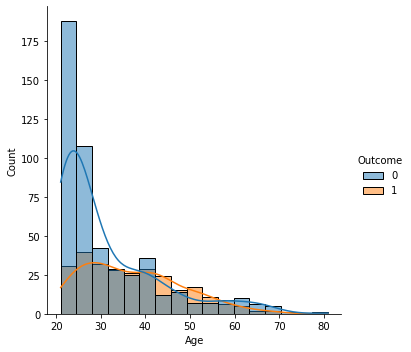

In [53]:
sns.displot(data = df,x = 'Age', hue = 'Outcome', kde =True )

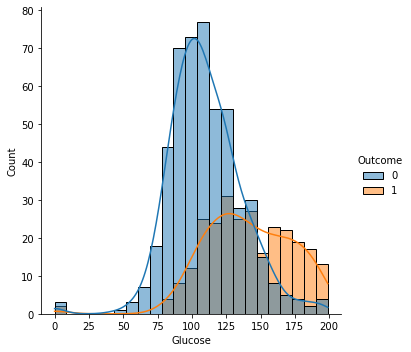

In [54]:
sns.displot(data = df,x = 'Glucose', hue = 'Outcome', kde =True )

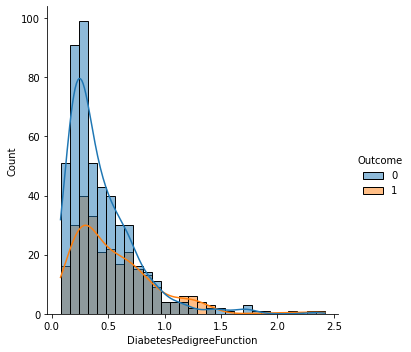

In [60]:
sns.displot(data = df,x = 'DiabetesPedigreeFunction', hue = 'Outcome', kde =True )

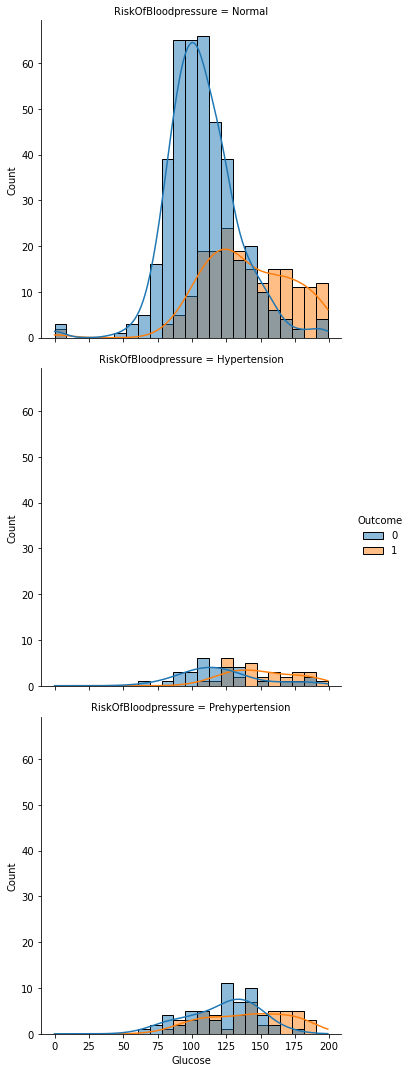

In [56]:
sns.displot(data = df2,x = 'Glucose', hue = 'Outcome', kde =True, row = "RiskOfBloodpressure" ) #esto lo sauqe del dataset de datos extendidos que hice abajo

## Dividir las varaibles

In [8]:
df.head().T

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [9]:
cat_names = []
cont_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
y_names = ['Outcome']

In [10]:
X = ft.range_of(df); len(X)

768

In [11]:
valid_cut = len(df)/4; valid_cut

192.0

In [12]:
train = 3 *valid_cut

In [13]:
src = ft.TabularPandas(df, procs = [ft.Categorify, ft.FillMissing],
                       cat_names = cat_names, cont_names = cont_names, y_names = y_names, y_block = ft.CategoryBlock,
                        splits = (X[:int(train)], X[int(train):]))

In [14]:
dls = src.dataloaders(bs = 110)

In [15]:
learn = ft.tabular_learner(dls,
                          layers = [256,128,128],
                          config = ft.tabular_config(act_cls = nn.LeakyReLU(inplace=True)),
                          opt_func = ft.ranger,
                          metrics = ft.accuracy,
                          )

In [42]:
len(X[:int(train)])

576

In [43]:
len(X[int(train):])

192

In [16]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=8, out_features=256, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=256, out_features=128, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=128, out_features=128, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (3): LinBnDrop(
      (0): Linear(in_features=128, out_features=2, bias=True)
    )


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.0063095735386013985)

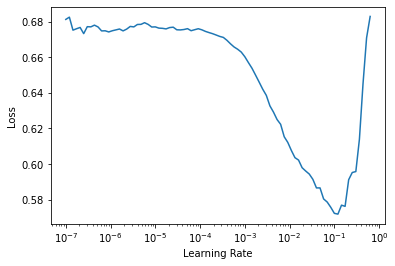

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(20,1e-3,div =2 ,pct_start = 0.7)

epoch,train_loss,valid_loss,accuracy,time
0,0.675644,0.716782,0.343750,00:00
1,0.669885,0.721906,0.369792,00:00
2,0.660435,0.706918,0.416667,00:00
3,0.650293,0.683369,0.562500,00:00
4,0.637296,0.654554,0.682292,00:00
5,0.621430,0.624064,0.760417,00:00
6,0.606455,0.564029,0.770833,00:00
7,0.590465,0.531082,0.765625,00:00
8,0.575162,0.506316,0.791667,00:00
9,0.559007,0.489122,0.807292,00:00


In [19]:
learn.show_results()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred
0,6.0,115.0,60.0,39.0,0.0,33.700001,0.245,40.0,1.0,0.0
1,3.0,103.0,72.0,30.0,152.0,27.600000,0.730,27.0,0.0,0.0
2,0.0,126.0,86.0,27.0,120.0,27.400000,0.515,21.0,0.0,0.0
3,0.0,125.0,68.0,0.0,0.0,24.700001,0.206,21.0,0.0,0.0
4,9.0,112.0,82.0,24.0,0.0,28.200001,1.282,50.0,1.0,1.0
5,2.0,112.0,78.0,50.0,140.0,39.400002,0.175,24.0,0.0,0.0
6,1.0,100.0,74.0,12.0,46.0,19.500000,0.149,28.0,0.0,0.0
7,3.0,102.0,74.0,0.0,0.0,29.500000,0.121,32.0,0.0,0.0
8,2.0,121.0,70.0,32.0,95.0,39.099998,0.886,23.0,0.0,0.0


In [20]:
learn.validate()

(#2) [0.45688191056251526,0.796875]

In [21]:
row, clas, probs = learn.predict(df.iloc[-1])

In [22]:
row

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     93.0           70.0           31.0      0.0  30.4   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.315  23.0      0.0  

In [23]:
clas, probs

(tensor(0), tensor([0.9337, 0.0663]))

## Mas datos

In [24]:
df2 = df.copy()

In [25]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
def check_bloodpressure(blood):
    values = []
    for x in blood:
        if x <= 80: 
            values.append( 'Normal' )
        elif x > 80 and x <= 89 : 
            values.append( 'Prehypertension')
        elif x > 89:
            values.append( 'Hypertension')
    return values

In [27]:
risk = check_bloodpressure(df2['BloodPressure'])

In [28]:
df2['RiskOfBloodpressure']= risk

In [29]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,RiskOfBloodpressure
0,6,148,72,35,0,33.6,0.627,50,1,Normal
1,1,85,66,29,0,26.6,0.351,31,0,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Normal
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Normal
764,2,122,70,27,0,36.8,0.340,27,0,Normal
765,5,121,72,23,112,26.2,0.245,30,0,Normal
766,1,126,60,0,0,30.1,0.349,47,1,Normal


In [30]:
df2['RiskOfBloodpressure'].unique()

array(['Normal', 'Hypertension', 'Prehypertension'], dtype=object)

In [31]:
cat_names = ['RiskOfBloodpressure']
cont_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
y_names = ['Outcome']

In [32]:
src = ft.TabularPandas(df2, procs = [ft.Categorify, ft.FillMissing],
                       cat_names = cat_names, cont_names = cont_names, y_names = y_names, y_block = ft.CategoryBlock,
                        splits = (X[:int(train)], X[int(train):]))

In [33]:
dls = src.dataloaders(bs = 110)

In [34]:
learn = ft.tabular_learner(dls,
                          layers = [256,128,128],
                          emb_szs = {'RiskOfBloodpressure': 3},
                          config = ft.tabular_config(act_cls = nn.LeakyReLU(inplace=True)),
                          opt_func = ft.ranger,
                          metrics = ft.accuracy,
                          )

In [35]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=11, out_features=256, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=256, out_features=128, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (2): LinBnDrop(
      (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=128, out_features=128, bias=False)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (3): LinBnDrop(
      (0): Linear(in_features=128, out

In [36]:
learn.summary()

TabularModel (Input shape: 110 x torch.Size([110, 8]))
Layer (type)         Output Shape         Param #    Trainable 
                     110 x 3             
Embedding                                 12         True      
Dropout                                                        
BatchNorm1d                               16         True      
BatchNorm1d                               22         True      
____________________________________________________________________________
                     110 x 256           
Linear                                    2816       True      
LeakyReLU                                                      
BatchNorm1d                               512        True      
____________________________________________________________________________
                     110 x 128           
Linear                                    32768      True      
LeakyReLU                                                      
BatchNorm1d              

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.009120108559727669)

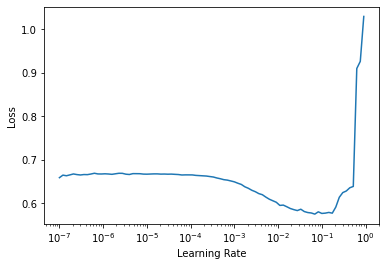

In [37]:
learn.lr_find()

In [38]:
learn.fit_one_cycle(20,1e-3,div = 2 ,pct_start = 0.5)

epoch,train_loss,valid_loss,accuracy,time
0,0.665015,0.677995,0.708333,00:00
1,0.659117,0.675126,0.713542,00:00
2,0.650194,0.662970,0.765625,00:00
3,0.637527,0.642501,0.776042,00:00
4,0.623058,0.615561,0.796875,00:00
5,0.607301,0.586098,0.796875,00:00
6,0.592373,0.530524,0.796875,00:00
7,0.577016,0.505302,0.807292,00:00
8,0.561945,0.487380,0.802083,00:00
9,0.547202,0.474129,0.802083,00:00


In [39]:
learn.show_results()

,RiskOfBloodpressure,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred
0,2.0,9.0,154.0,78.0,30.0,100.0,30.900000,0.164,45.0,0.0,1.0
1,2.0,10.0,92.0,62.0,0.0,0.0,25.900000,0.167,31.0,0.0,0.0
2,2.0,6.0,165.0,68.0,26.0,168.0,33.599998,0.631,49.0,0.0,1.0
3,2.0,3.0,173.0,78.0,39.0,185.0,33.799999,0.970,31.0,1.0,1.0
4,2.0,2.0,118.0,80.0,0.0,0.0,42.900002,0.693,21.0,1.0,0.0
5,2.0,1.0,112.0,80.0,45.0,132.0,34.799999,0.217,24.0,0.0,0.0
6,3.0,11.0,136.0,84.0,35.0,130.0,28.299999,0.260,42.0,1.0,1.0
7,2.0,0.0,107.0,60.0,25.0,0.0,26.400000,0.133,23.0,0.0,0.0
8,2.0,1.0,140.0,74.0,26.0,180.0,24.100000,0.828,23.0,0.0,0.0


In [40]:
learn.validate()

(#2) [0.44230756163597107,0.8020832538604736]